In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_dir = os.getcwd()
npz_dir = os.path.join(base_dir, "../fit_results")
neg_xtalk_matrix = np.full((101, 101),np.nan)
pos_xtalk_matrix = np.full((101, 101),np.nan)
neg_fail_list = []
pos_fail_list = []
scenarios = set()

for j1 in range(101):
    for j2 in range(101):
        npz_path = os.path.join(npz_dir, f"fit_neg_{j1}_{j2}.npz")
        with np.load(npz_path) as data:
            success = data["success"]
            reason = str(data["reason"])
            mu = float(data["mu"])
            sigma = float(data["sigma"])
        if reason not in scenarios:
            scenarios.add(reason)
        neg_xtalk_matrix[j1,j2] = mu
        if reason == "Optimal parameters not found: Number of calls to function has reached maxfev = 800.":
            neg_fail_list.append(f"{j1},{j2}")

        npz_path = os.path.join(npz_dir, f"fit_pos_{j1}_{j2}.npz")
        with np.load(npz_path) as data:
            success = data["success"]
            reason = str(data["reason"])
            mu = float(data["mu"])
            sigma = float(data["sigma"])
        if reason not in scenarios:
            scenarios.add(reason)
        pos_xtalk_matrix[j1,j2] = mu
        if reason == "Optimal parameters not found: Number of calls to function has reached maxfev = 800.":
            pos_fail_list.append(f"{j1},{j2}")

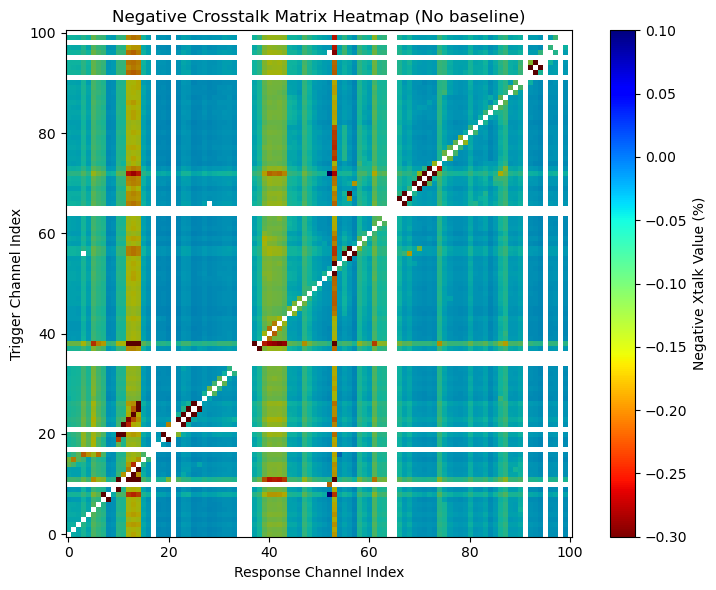

In [3]:
# Set up value range and colormap
vmin = -0.3  # red
vmax = 0.1   # blue
cmap = plt.cm.jet_r  # matches your uploaded colorbar

# Create the plot
plt.figure(figsize=(8, 6))
im = plt.imshow(neg_xtalk_matrix, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('Negative Xtalk Value (%)')

# Axis labels
plt.xlabel('Response Channel Index')
plt.ylabel('Trigger Channel Index')
plt.title('Negative Crosstalk Matrix Heatmap (No baseline)')

# Optional: overlay for missing values (NaNs)
nan_mask = np.isnan(neg_xtalk_matrix)
if np.any(nan_mask):
    plt.imshow(nan_mask, origin='lower', cmap='gray', alpha=0.3)

# Save & display
plt.tight_layout()
plt.show()

In [4]:
print(scenarios)
print(neg_fail_list)
print(pos_fail_list)

{'ok', 'ok but with insufficient points', 'low_stats', 'Optimal parameters not found: Number of calls to function has reached maxfev = 800.'}
['56,3', '66,28', '96,52']
['0,28', '0,44', '1,27', '1,32', '1,57', '1,77', '2,25', '2,28', '2,67', '3,25', '3,27', '3,30', '3,32', '3,52', '3,84', '4,30', '4,37', '5,23', '5,32', '5,54', '5,55', '6,57', '7,26', '7,57', '9,29', '11,28', '12,49', '12,56', '12,70', '12,86', '13,16', '13,24', '13,71', '16,24', '18,28', '18,45', '19,46', '19,67', '20,23', '20,51', '20,54', '20,56', '22,16', '22,57', '23,16', '25,60', '26,37', '26,94', '27,20', '27,46', '28,1', '28,90', '29,45', '29,57', '30,44', '31,19', '31,24', '31,32', '31,49', '32,27', '32,29', '33,11', '33,22', '33,44', '33,70', '37,25', '38,15', '39,31', '40,80', '41,24', '41,27', '42,23', '42,46', '42,56', '44,24', '45,32', '46,52', '47,27', '47,32', '47,50', '50,8', '51,29', '51,31', '51,92', '54,19', '54,23', '55,29', '55,30', '56,0', '56,84', '57,52', '58,4', '59,16', '59,67', '61,32', '61,

Text(0.5, 1.0, 'Positive Crosstalk Matrix Heatmap')

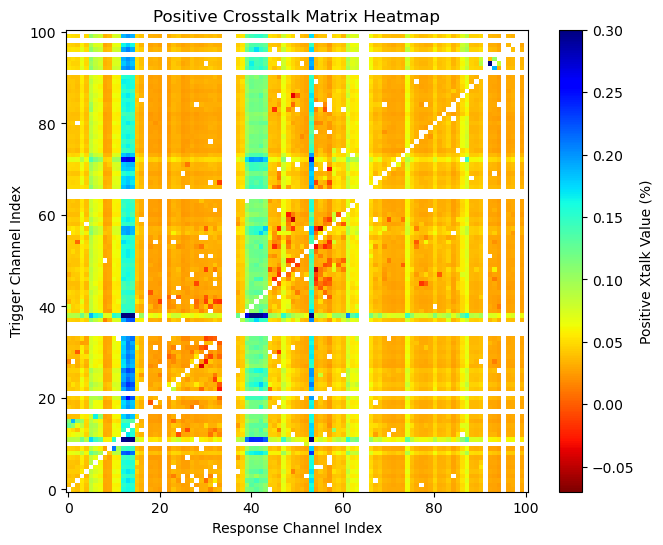

In [5]:
# Set up value range and colormap
vmin = -0.07  # red
vmax = 0.3   # blue
cmap = plt.cm.jet_r  # matches your uploaded colorbar

# Create the plot
plt.figure(figsize=(8, 6))
im = plt.imshow(pos_xtalk_matrix, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label('Positive Xtalk Value (%)')

# Axis labels
plt.xlabel('Response Channel Index')
plt.ylabel('Trigger Channel Index')
plt.title('Positive Crosstalk Matrix Heatmap')

In [6]:
j1 = 13
j2 = 40
npz_path = os.path.join(npz_dir, f"fit_neg_{j1}_{j2}.npz")
with np.load(npz_path) as data:
    data = np.load(npz_path)
    print(data["success"])
    print(data["reason"])
    print(list(data.keys()))
    print(data.files)

True
ok
['success', 'reason', 'A', 'mu', 'sigma', 'total_events']
['success', 'reason', 'A', 'mu', 'sigma', 'total_events']
